<a href="https://colab.research.google.com/github/nikpournastaran/DataMining-NPHA/blob/main/FINAL_PROJECT_17JUNE_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---



 **1 . Importing necessary libraries**




---




In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier # Import LightGBM Classifier
from sklearn.linear_model import LogisticRegression

---




 **2 . Loading the Dataset**



---


In [2]:
df = pd.read_csv('/content/NPHA-doctor-visits.csv')
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Number of Doctors Visited                   714 non-null    int64
 1   Age                                         714 non-null    int64
 2   Phyiscal Health                             714 non-null    int64
 3   Mental Health                               714 non-null    int64
 4   Dental Health                               714 non-null    int64
 5   Employment                                  714 non-null    int64
 6   Stress Keeps Patient from Sleeping          714 non-null    int64
 7   Medication Keeps Patient from Sleeping      714 non-null    int64
 8   Pain Keeps Patient from Sleeping            714 non-null    int64
 9   Bathroom Needs Keeps Patient from Sleeping  714 non-null    int64
 10  Uknown Keeps Pat


---


**3. EDA**


---


**Unique values**

In [3]:
data = {
        'Age': [2] * 714,
        'Physical_Health': np.random.choice([1, 2, 3, 4, 5, -1], size=714),
        'Mental_Health': np.random.choice([1, 2, 3, 4, 5, -1], size=714),
        'Dental_Health': np.random.choice([1, 2, 3, 4, 5, -1, 6], size=714), # Including 6
        'Employment': np.random.choice([1, 2, 3, 4, -1], size=714),
        'Stress_Keeps_Patient_from_Sleeping': np.random.choice([0, 1], size=714),
        'Medication_Keeps_Patient_from_Sleeping': np.random.choice([0, 1], size=714),
        'Pain_Keeps_Patient_from_Sleeping': np.random.choice([0, 1], size=714),
        'Bathroom_Needs_Keeps_Patient_from_Sleeping': np.random.choice([0, 1], size=714),
        'Prescription_Sleep_Medication': np.random.choice([1, 2, 3, -1], size=714),
        'Race': np.random.choice([1, 2, 3, 4, 5, -1, -2], size=714),
        'Gender': np.random.choice([1, 2], size=714),
        'trouble sleeping': np.random.choice([1, 2, 3], size=714),
        'Number_of_Doctors_Visited': np.random.choice([1, 2, 3], size=714)
    }

print("\nUnique values and their counts for each column (before preprocessing):")
for col in df.columns:
    print(f"- {col}: {df[col].nunique()} unique values -> {df[col].unique()}")


Unique values and their counts for each column (before preprocessing):
- Number of Doctors Visited: 3 unique values -> [3 2 1]
- Age: 1 unique values -> [2]
- Phyiscal Health: 6 unique values -> [ 4  3  2  5  1 -1]
- Mental Health: 6 unique values -> [ 3  2  1  4 -1  5]
- Dental Health: 7 unique values -> [ 3  4  1  6  2  5 -1]
- Employment: 4 unique values -> [3 1 2 4]
- Stress Keeps Patient from Sleeping: 2 unique values -> [0 1]
- Medication Keeps Patient from Sleeping: 2 unique values -> [0 1]
- Pain Keeps Patient from Sleeping: 2 unique values -> [0 1]
- Bathroom Needs Keeps Patient from Sleeping: 2 unique values -> [0 1]
- Uknown Keeps Patient from Sleeping: 2 unique values -> [1 0]
- Trouble Sleeping: 4 unique values -> [ 2  3  1 -1]
- Prescription Sleep Medication: 4 unique values -> [ 3  1  2 -1]
- Race: 5 unique values -> [1 4 2 5 3]
- Gender: 2 unique values -> [2 1]


**Delete "Age"**

In [4]:
if 'Age' in df.columns:
    df = df.drop('Age', axis=1)
    print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Number of Doctors Visited                   714 non-null    int64
 1   Phyiscal Health                             714 non-null    int64
 2   Mental Health                               714 non-null    int64
 3   Dental Health                               714 non-null    int64
 4   Employment                                  714 non-null    int64
 5   Stress Keeps Patient from Sleeping          714 non-null    int64
 6   Medication Keeps Patient from Sleeping      714 non-null    int64
 7   Pain Keeps Patient from Sleeping            714 non-null    int64
 8   Bathroom Needs Keeps Patient from Sleeping  714 non-null    int64
 9   Uknown Keeps Patient from Sleeping          714 non-null    int64
 10  Trouble Sleeping

**'trouble sleeping' =  0,1**

In [6]:
if 'Trouble Sleeping' in df.columns:
    print(f"Unique values in 'trouble sleeping' after rectification: {df['Trouble Sleeping'].unique()}")
else:
    print("Column 'trouble sleeping' not found in the DataFrame.")

if 'Trouble Sleeping' in df.columns:
 df['Trouble Sleeping'] = df['Trouble Sleeping'].apply(lambda x: 1 if x == 1 else 0)


Unique values in 'trouble sleeping' after rectification: [0 1]




---


**4. Visualization**


---



In [8]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

**Target Variable Distribution**

<ipython-input-9-ce127bbe430c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_column, data=df, palette='viridis')


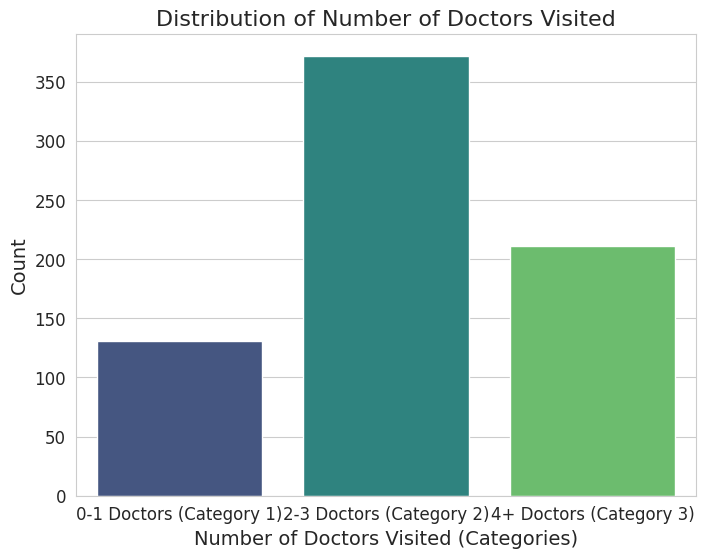

Distribution of Number of Doctors Visited:
Number of Doctors Visited
2    52.100840
3    29.551821
1    18.347339
Name: proportion, dtype: float64


In [9]:
target_column = 'Number of Doctors Visited'

plt.figure(figsize=(8, 6))
sns.countplot(x=target_column, data=df, palette='viridis')
plt.title(f'Distribution of {target_column}')
plt.xlabel('Number of Doctors Visited (Categories)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['0-1 Doctors (Category 1)', '2-3 Doctors (Category 2)', '4+ Doctors (Category 3)']) # Adjust labels if needed
plt.show()

print(f"Distribution of {target_column}:")
print(df[target_column].value_counts(normalize=True) * 100)

**Individual Feature Distributions**

<ipython-input-11-e192cb08a832>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='cubehelix', ax=ax)
<ipython-input-11-e192cb08a832>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='cubehelix', ax=ax)
<ipython-input-11-e192cb08a832>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='cubehelix', ax=ax)
<ipython-input-11-e192cb08a832>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

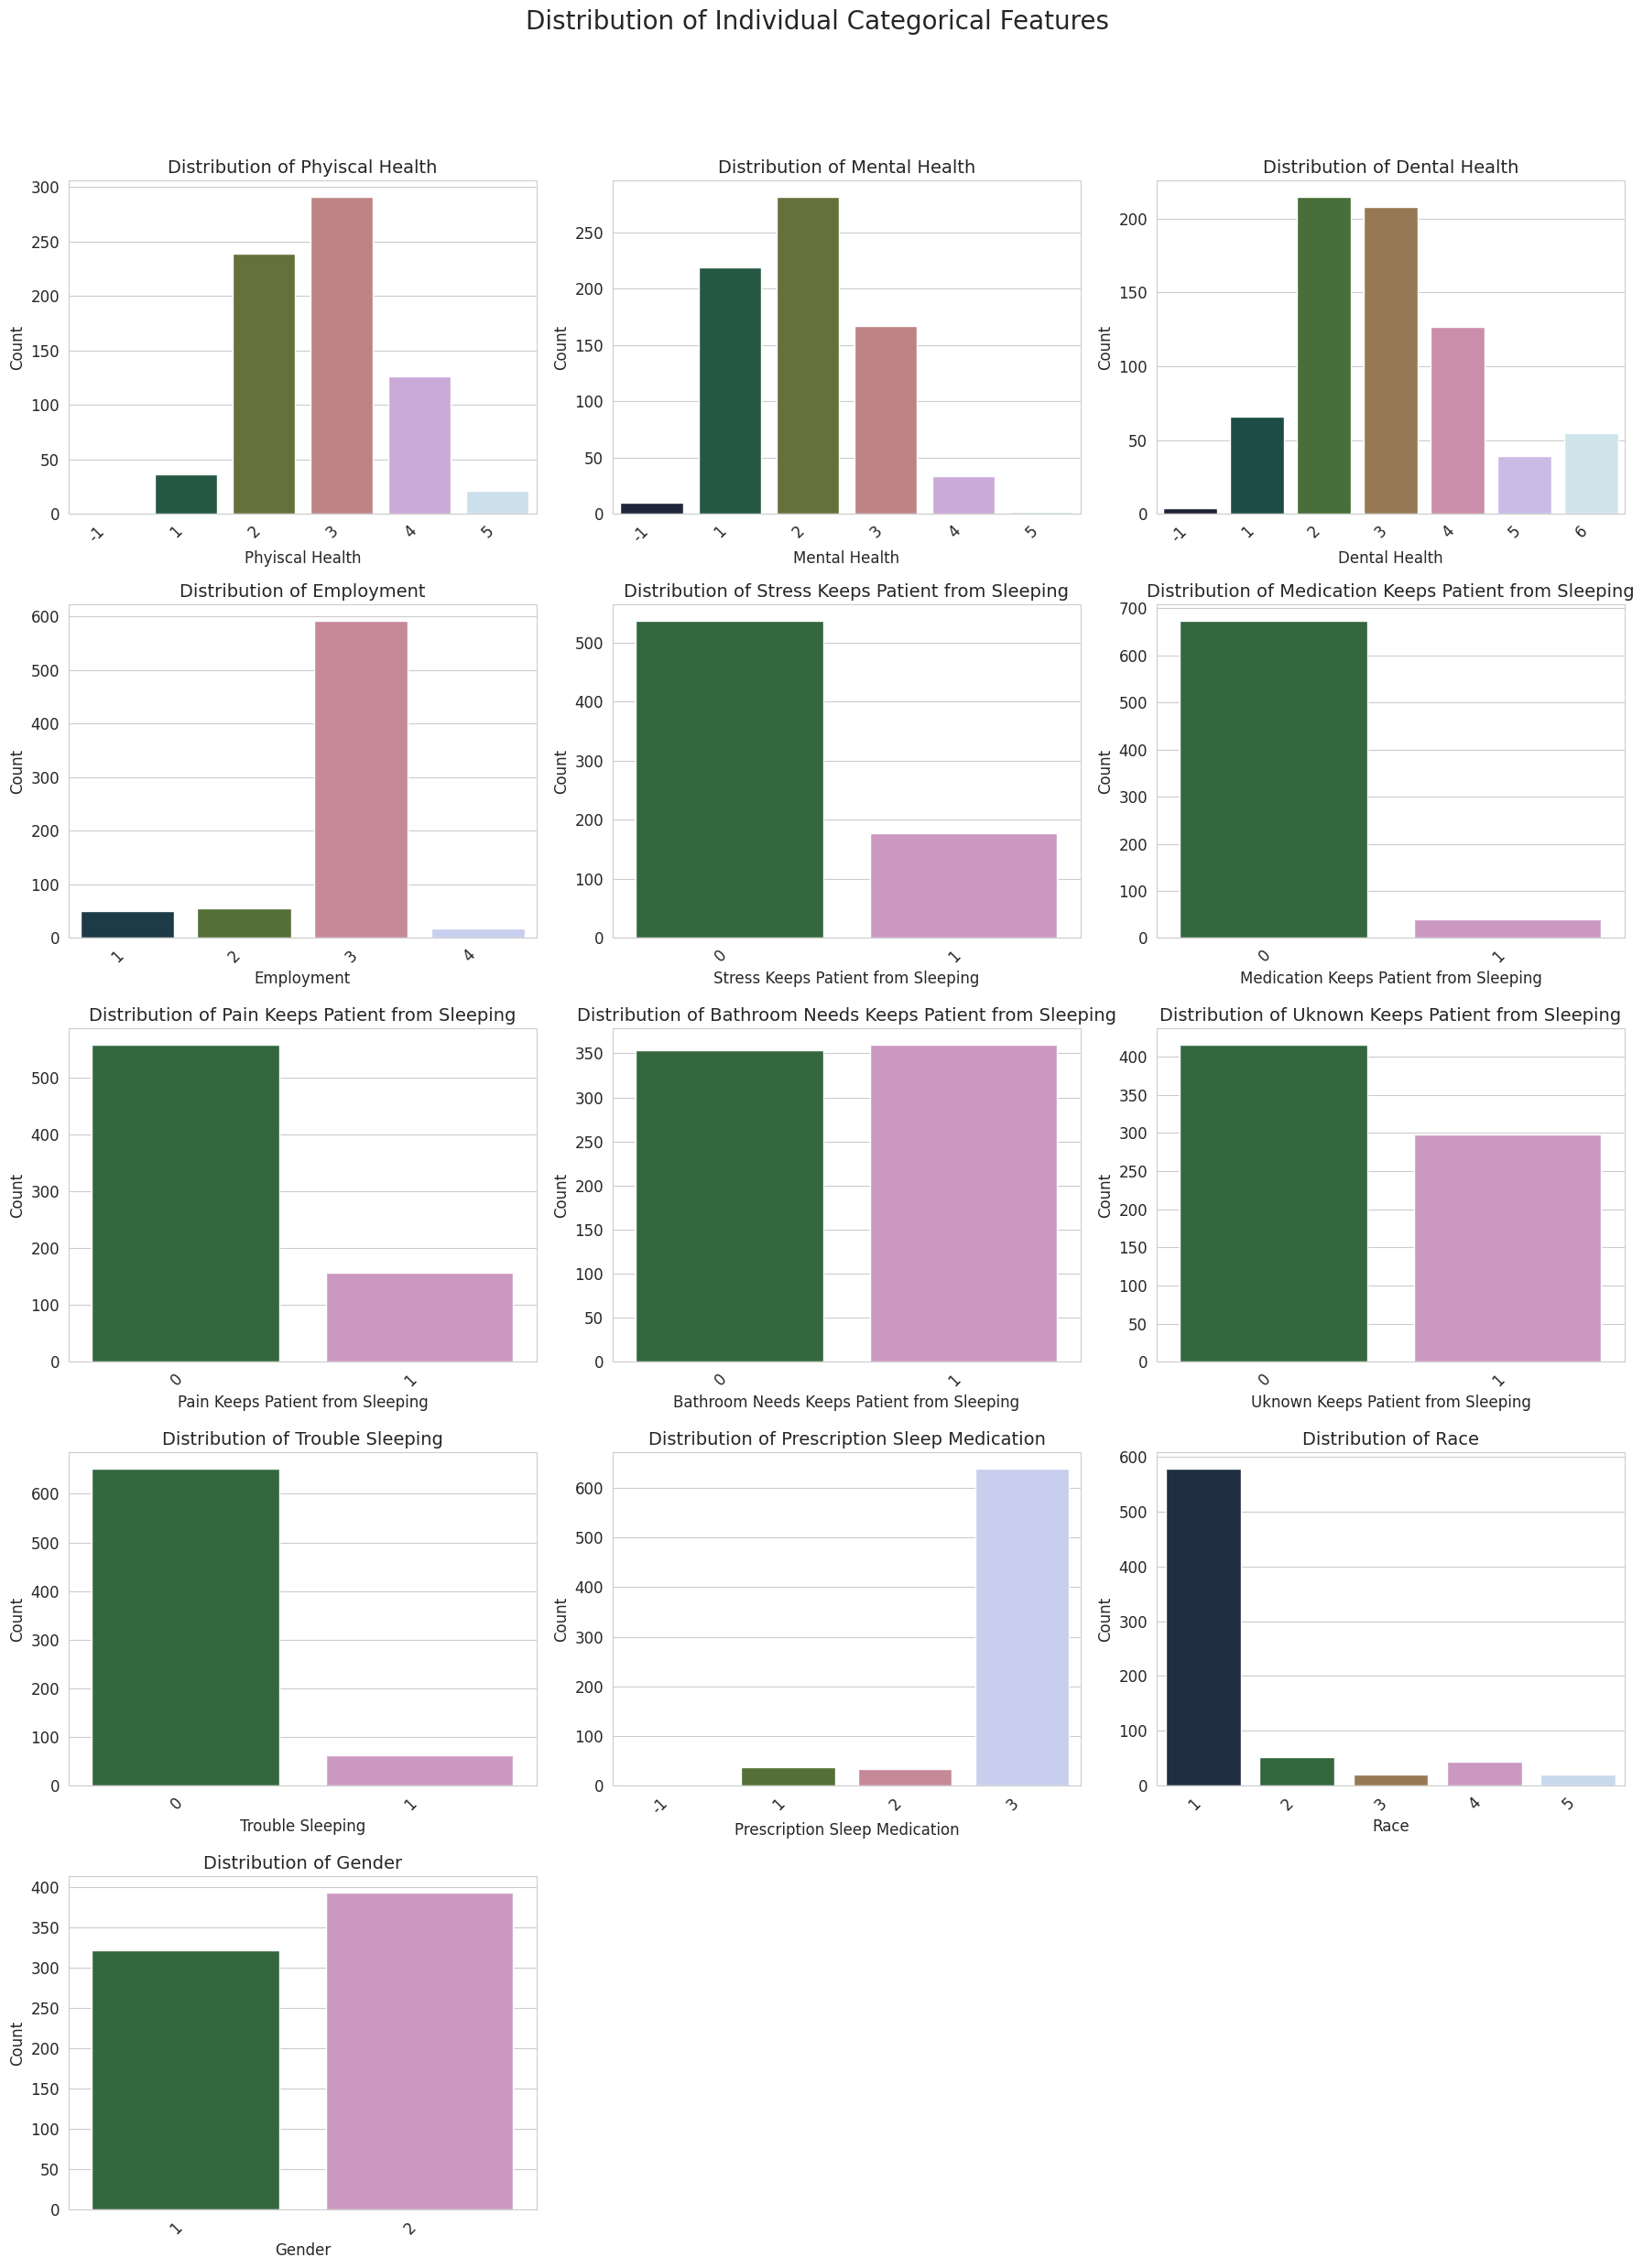

In [11]:
categorical_features = df.drop(columns=[target_column], errors='ignore').columns.tolist()

# Create subplots for better visualization of multiple features
n_cols = 3 # You can adjust this for how many plots per row
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 5))
plt.suptitle('Distribution of Individual Categorical Features', y=1.02, fontsize=20)

for i, feature in enumerate(categorical_features):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=feature, data=df, palette='cubehelix', ax=ax)
    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

    # Optional: Add value counts as text on bars for clarity, especially for features with few categories
    # for p in ax.patches:
    #     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
    #                 ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent overlap with suptitle
plt.show()

**Feature-Target Relationship**

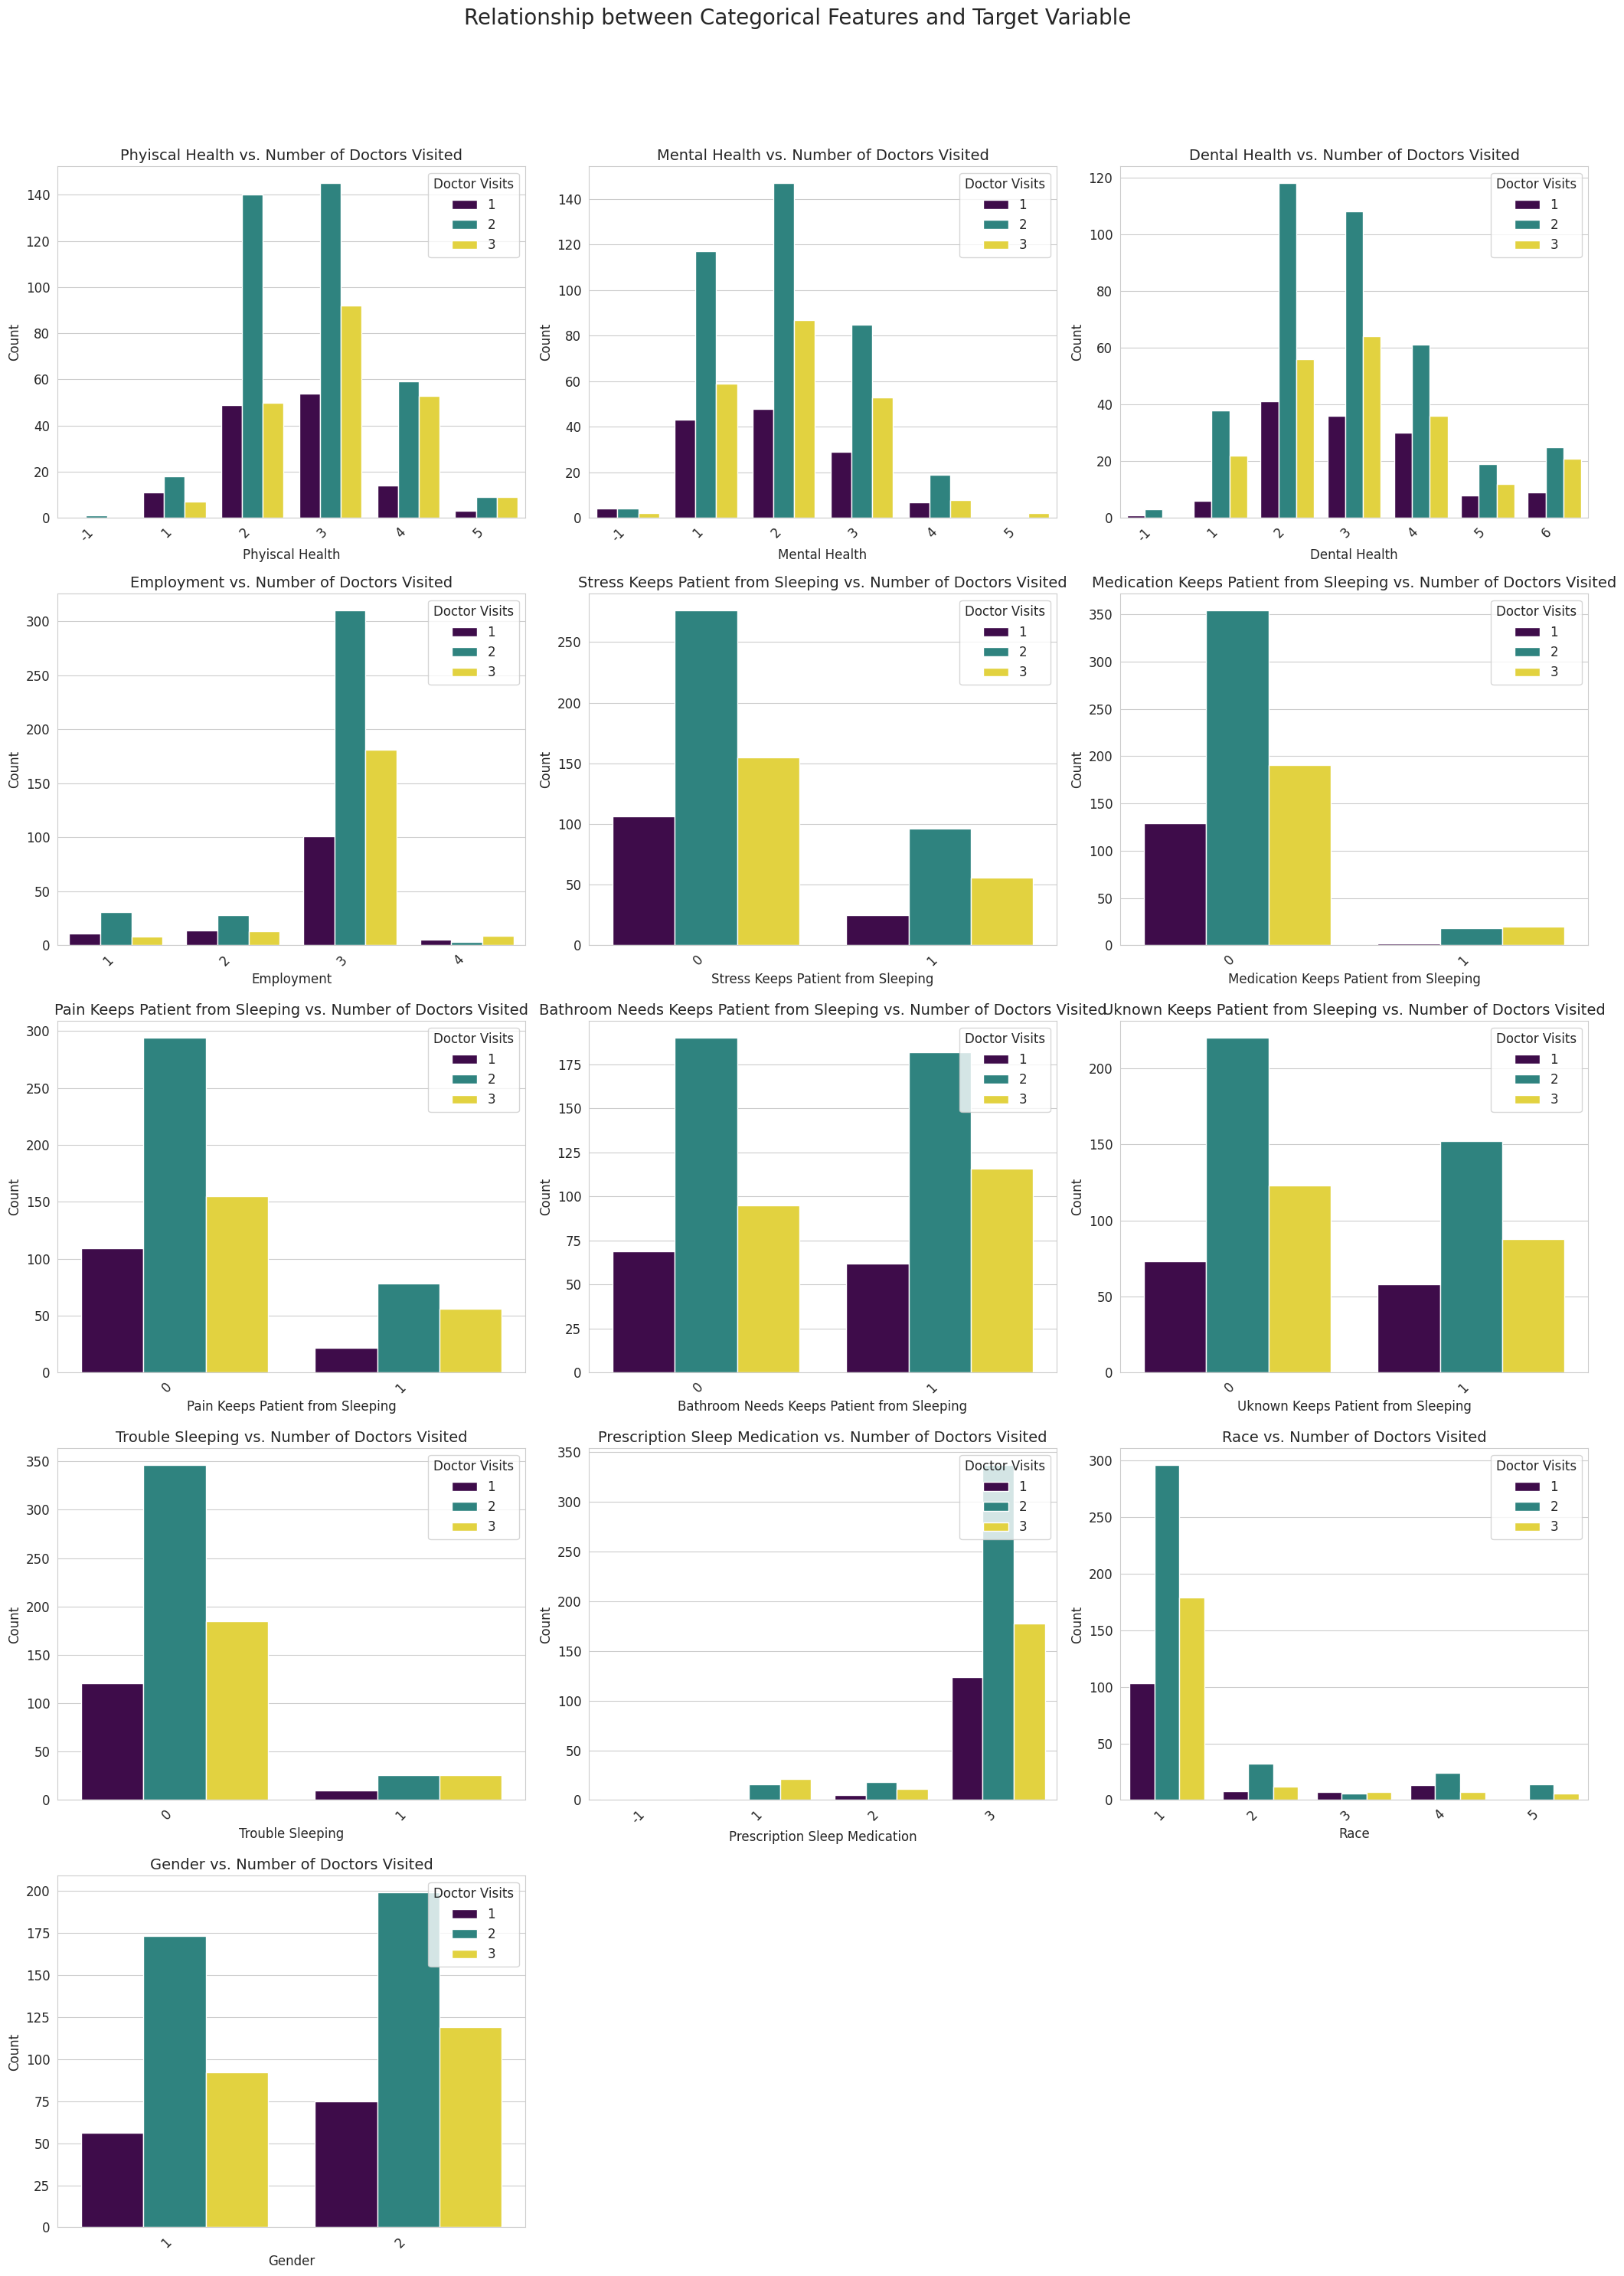

In [12]:
# Relationship between each categorical feature and the target variable
plt.figure(figsize=(n_cols * 7, n_rows * 6))
plt.suptitle('Relationship between Categorical Features and Target Variable', y=1.02, fontsize=20)

for i, feature in enumerate(categorical_features):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    # Use sns.countplot with 'hue' for the target variable
    sns.countplot(x=feature, hue=target_column, data=df, palette='viridis', ax=ax)
    ax.set_title(f'{feature} vs. {target_column}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    ax.legend(title='Doctor Visits', loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

**Feature-Feature Correlation**

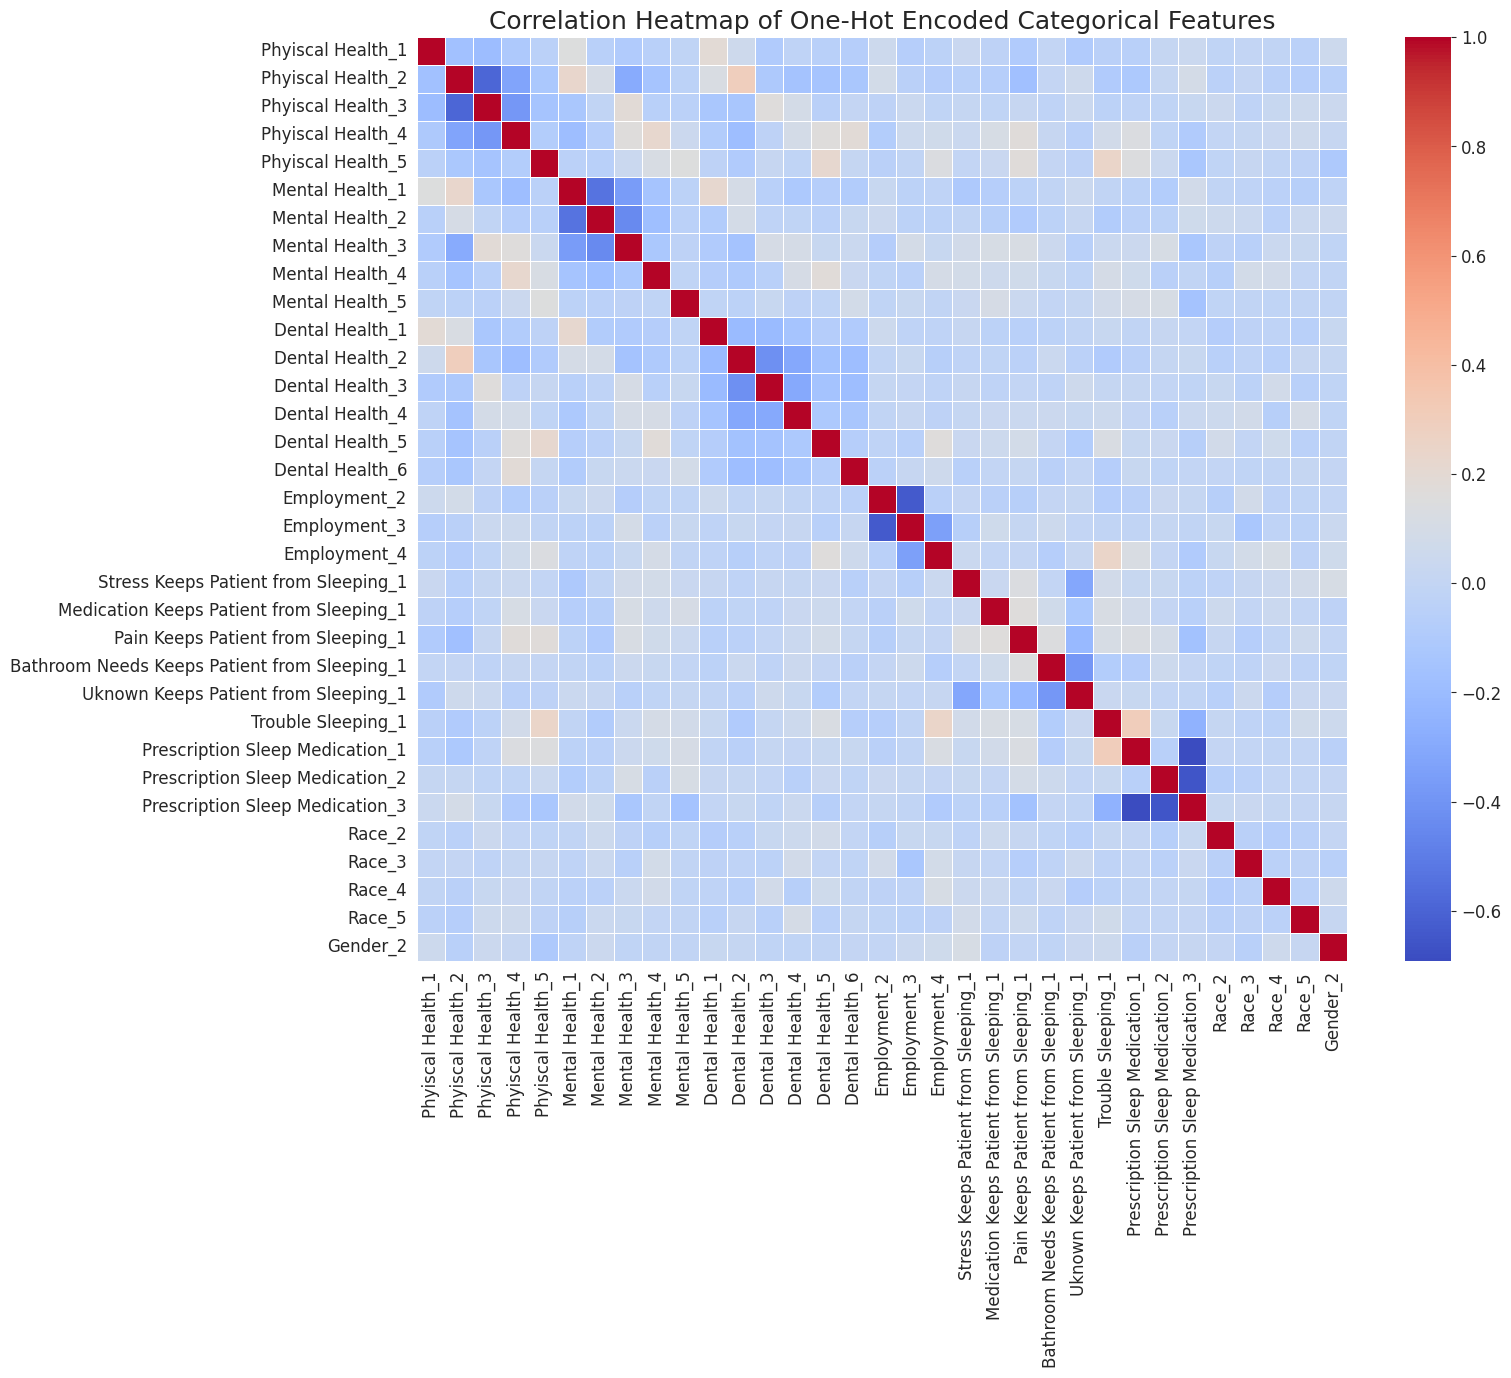

In [13]:
# Create a temporary DataFrame with One-Hot Encoded features for correlation analysis
# Exclude the target column for now, as we're looking for feature-feature correlation
df_encoded = df.drop(columns=[target_column], errors='ignore').copy()

# Apply One-Hot Encoding to all categorical features (they are already identified)
# Make sure to handle potential issues with new categories in unseen data if this were a production pipeline
# For EDA, we're just transforming the current data.
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features, drop_first=True) # drop_first avoids perfect multicollinearity for OHE itself

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5) # annot=True if you want numbers on heatmap
plt.title('Correlation Heatmap of One-Hot Encoded Categorical Features', fontsize=18)
plt.show()


**Correlation of Features with "Number of Doctors Visited**



<ipython-input-14-8eca199bb9a6>:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # Adjust layout to prevent labels from overlapping


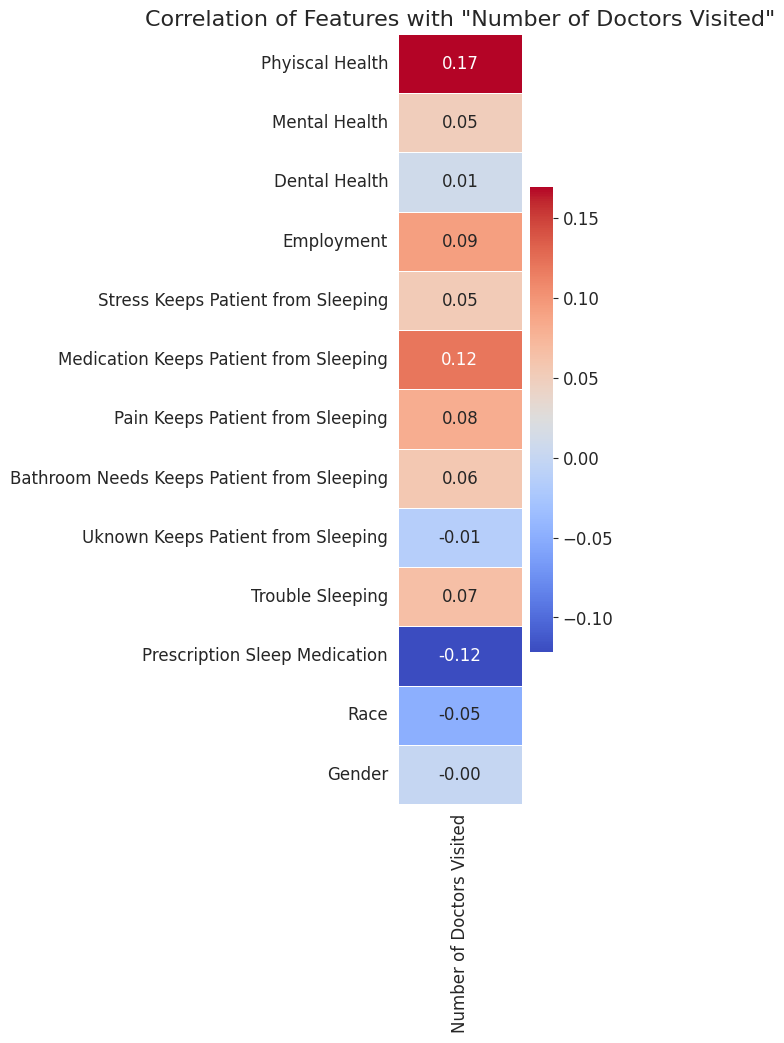


Correlations of Features with 'Number of Doctors Visited':
                                            Number of Doctors Visited
Phyiscal Health                                              0.169629
Mental Health                                                0.049990
Dental Health                                                0.009371
Employment                                                   0.092578
Stress Keeps Patient from Sleeping                           0.053040
Medication Keeps Patient from Sleeping                       0.120549
Pain Keeps Patient from Sleeping                             0.081990
Bathroom Needs Keeps Patient from Sleeping                   0.056043
Uknown Keeps Patient from Sleeping                          -0.014095
Trouble Sleeping                                             0.065931
Prescription Sleep Medication                               -0.121345
Race                                                        -0.049186
Gender                        

In [14]:

data = {
    'Physical Health_1': [1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
    'Physical Health_2': [0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
    'Physical Health_3': [0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
    'Mental Health_1': [1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
    'Dental Health_1': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'Employment_1': [1, 1, 0, 0, 1, 1, 0, 0, 1, 1], # Assuming 'employed'
    'Stress Keeps Patient from Sleeping_1': [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
    'Prescription Sleep Medication_1': [0, 0, 1, 0, 1, 0, 0, 1, 0, 1],
    'Race_1': [1, 1, 0, 0, 1, 1, 0, 0, 1, 1], # Assuming 'Race_1' is common
    'Gender_1': [1, 1, 1, 1, 0, 0, 0, 0, 1, 1], # Assuming 'Gender_1' is female
    'Number of Doctors Visited': [1, 2, 3, 1, 2, 3, 1, 2, 3, 1] # Target variable
}
# Extend with more dummy data to match the length of a real dataset
for _ in range(90): # Add 90 more rows for a total of 100
    for col in data:
        if col != 'Number of Doctors Visited':
            data[col].append(pd.Series([0,1]).sample(1).iloc[0]) # Random 0 or 1
        else:
            data[col].append(pd.Series([1,2,3]).sample(1).iloc[0]) # Random 1, 2, or 3



# --- 2. Calculate correlations with the target variable ---
# Select only the features and the target variable
# If you have many features, you might want to create a list of your feature columns
# For this example, we'll use all columns except the target as features.
features = [col for col in df.columns if col != 'Number of Doctors Visited']
target = 'Number of Doctors Visited'

# Calculate the correlation of each feature with the target variable
correlations_with_target = df[features + [target]].corr()[[target]].drop(target)

# --- 3. Create the heatmap ---
plt.figure(figsize=(2, 10)) # Adjust figure size as needed, depends on number of features
sns.heatmap(correlations_with_target,
            annot=True,       # Show the correlation values on the heatmap
            cmap='coolwarm',  # Color map (coolwarm is good for correlations, red for positive, blue for negative)
            fmt=".2f",        # Format annotation to two decimal places
            linewidths=.5,    # Add lines between cells
            cbar=True)        # Show the color bar

plt.title('Correlation of Features with "Number of Doctors Visited"')
plt.yticks(rotation=0) # Keep feature names horizontal
plt.xticks(rotation=90) # Keep target name horizontal
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# You can also print the correlations directly
print("\nCorrelations of Features with 'Number of Doctors Visited':")
print(correlations_with_target)

---


**5. Modeling**



---



**Check for -1 (Refused) and -2 (Not asked)**

In [15]:
# 4. Check for -1 (Refused) and -2 (Not asked) categories as per dataset description
# No need to check for general missing values, as the dataset is preprocessed to remove them.
# However, -1 and -2 are treated as distinct categories.
print("\n--- Checking for -1 (Refused) and -2 (Not Asked) categories ---")
columns_to_check_special_categories = [
    'Physical_Health', 'Mental_Health', 'Dental_Health', 'Employment',
    'Prescription_Sleep_Medication', 'Race', 'Gender'
]

for col in columns_to_check_special_categories:
    if col in df.columns:
        if -1 in df[col].unique() or -2 in df[col].unique():
            print(f"Column '{col}' contains -1 or -2 values.")
            print(df[col].value_counts().sort_index())
    else:
        print(f"Column '{col}' not found in DataFrame.")


--- Checking for -1 (Refused) and -2 (Not Asked) categories ---
Column 'Physical_Health' not found in DataFrame.
Column 'Mental_Health' not found in DataFrame.
Column 'Dental_Health' not found in DataFrame.
Column 'Prescription_Sleep_Medication' not found in DataFrame.


**Feature and Target Definition**

In [18]:
X = df.drop('Number of Doctors Visited', axis=1)

# Define the target variable (y)
y = df['Number of Doctors Visited']


 **Splitting Data into Training and Testing Sets**

In [19]:
# test_size=0.2 means 20% of the data will be used for testing.
# random_state=42 ensures reproducibility of the split.
# stratify=y ensures that the proportion of each class in y is the same in both training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of training features (X_train): {X_train.shape}")
print(f"Shape of testing features (X_test): {X_test.shape}")
print(f"Shape of training target (y_train): {y_train.shape}")
print(f"Shape of testing target (y_test): {y_test.shape}")

print("\nData splitting complete. The model will be trained on X_train/y_train and evaluated on X_test/y_test.")

Shape of training features (X_train): (571, 13)
Shape of testing features (X_test): (143, 13)
Shape of training target (y_train): (571,)
Shape of testing target (y_test): (143,)

Data splitting complete. The model will be trained on X_train/y_train and evaluated on X_test/y_test.



---

**6. Model Selection and Training**


---



**Random Forest Classifier**

In [31]:
features_for_one_hot_encoding = [col for col in df.columns if col != 'Number of Doctors Visited']
df_encoded = pd.get_dummies(df, columns=features_for_one_hot_encoding, drop_first=False)
model = RandomForestClassifier(n_estimators=100, random_state=42)
# n_estimators: The number of trees in the forest. 100 is a good starting point.
df = pd.read_csv('NPHA-doctor-visits.csv')
# 2. Train the model on the training data
print(f"\nTraining {type(model).__name__}...")
model.fit(X_train, y_train)
print(f"{type(model).__name__} training completed.")

# 3. Make predictions on the test data
y_pred = model.predict(X_test)

# 4. Evaluate the model's performance
# Classification Report (Precision, Recall, F1-Score for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Overall Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")




Training RandomForestClassifier...
RandomForestClassifier training completed.

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        26
           2       0.51      0.69      0.59        75
           3       0.34      0.29      0.31        42

    accuracy                           0.45       143
   macro avg       0.28      0.33      0.30       143
weighted avg       0.37      0.45      0.40       143

Overall Accuracy: 0.4476


**Re-training Random Forest Classifier with Class Weight Balancing**

In [35]:
# Choose a Classifier Model: RandomForestClassifier with class_weight='balanced'
model_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# class_weight='balanced' automatically adjusts weights inversely proportional to class frequencies.

# Train the model on the training data
print(f"\nTraining {type(model_balanced).__name__} with balanced class weights...")
model_balanced.fit(X_train, y_train)
print(f"{type(model_balanced).__name__} training completed.")

# Make predictions on the test data
y_pred_balanced = model_balanced.predict(X_test)


# Classification Report (Precision, Recall, F1-Score for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_balanced))

# Overall Accuracy
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f"Overall Accuracy: {accuracy_balanced:.4f}")




Training RandomForestClassifier with balanced class weights...
RandomForestClassifier training completed.

Classification Report:
              precision    recall  f1-score   support

           1       0.08      0.04      0.05        26
           2       0.53      0.68      0.60        75
           3       0.43      0.36      0.39        42

    accuracy                           0.47       143
   macro avg       0.35      0.36      0.35       143
weighted avg       0.42      0.47      0.44       143

Overall Accuracy: 0.4685


**Hyperparameter Tuning with GridSearchCV**

In [38]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the tree
    'min_samples_split': [2, 5],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],      # Minimum number of samples required to be at a leaf node
}

# Create a base model (we'll set class_weight here)
base_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=base_model,
                           param_grid=param_grid,
                           cv=5, # 5-fold cross-validation
                           scoring='f1_weighted', # Use weighted F1-score as evaluation metric due to imbalance
                           n_jobs=-1, # Use all available CPU cores
                           verbose=1) # Display progress

# Fit the grid search to the training data
print("\nPerforming Grid Search... This might take a few minutes.")
grid_search.fit(X_train, y_train)
print("Grid Search completed.")

# Get the best model found by GridSearchCV
best_model = grid_search.best_estimator_

print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best score (weighted F1) on validation sets: {grid_search.best_score_:.4f}")

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model's performance on the test set
print("\n--- Best Model Evaluation (after Hyperparameter Tuning) ---")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Overall Accuracy: {accuracy_best:.4f}")

print("\nHyperparameter tuning and final evaluation completed.")


Performing Grid Search... This might take a few minutes.
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Grid Search completed.

Best parameters found: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best score (weighted F1) on validation sets: 0.4220

--- Best Model Evaluation (after Hyperparameter Tuning) ---

Classification Report:
              precision    recall  f1-score   support

           1       0.11      0.08      0.09        26
           2       0.54      0.55      0.54        75
           3       0.45      0.52      0.48        42

    accuracy                           0.45       143
   macro avg       0.37      0.38      0.37       143
weighted avg       0.44      0.45      0.44       143

Overall Accuracy: 0.4545

Hyperparameter tuning and final evaluation completed.


**LightGBM Classifier**

In [40]:
# 1. Choose a Classifier Model: LightGBM Classifier
# We'll set class_weight='balanced' to handle class imbalance
# and random_state for reproducibility.
# LightGBM handles categorical features implicitly if they are passed as 'category' dtype,
# but since we already one-hot encoded them, it's fine.
# objective='multiclass' and num_class=len(y.unique()) are for multi-class classification.
model_lgbm = LGBMClassifier(objective='multiclass',
                            num_class=len(y.unique()),
                            random_state=42,
                            class_weight='balanced')

# 2. Train the model on the training data
print(f"\nTraining {type(model_lgbm).__name__}...")
# Note: LightGBM might convert boolean dtypes to int (0/1) internally if needed.
model_lgbm.fit(X_train, y_train)
print(f"{type(model_lgbm).__name__} training completed.")

# 3. Make predictions on the test data
print("\nMaking predictions on the test set...")
y_pred_lgbm = model_lgbm.predict(X_test)
print("Predictions completed.")

# 4. Evaluate the model's performance
print("\n--- LightGBM Model Evaluation ---")

# Classification Report (Precision, Recall, F1-Score for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm))

# Overall Accuracy
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Overall Accuracy: {accuracy_lgbm:.4f}")

print("\nLightGBM model training and evaluation completed.")


Training LGBMClassifier...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 53
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 13
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

**Hyperparameter Tuning with GridSearchCV for LightGBM**

In [41]:
# Define the parameter grid to search for LightGBM
param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40], # Default is 31
    'max_depth': [-1, 10, 20],  # -1 means no limit
    'reg_alpha': [0, 0.1],       # L1 regularization
    'reg_lambda': [0, 0.1]       # L2 regularization
}

# Create a base LightGBM model with balanced class weights
base_model_lgbm = LGBMClassifier(objective='multiclass',
                                 num_class=len(y.unique()),
                                 random_state=42,
                                 class_weight='balanced')

# Create the GridSearchCV object
grid_search_lgbm = GridSearchCV(estimator=base_model_lgbm,
                                param_grid=param_grid_lgbm,
                                cv=5, # 5-fold cross-validation
                                scoring='f1_weighted', # Use weighted F1-score as evaluation metric
                                n_jobs=-1, # Use all available CPU cores
                                verbose=1) # Display progress

# Fit the grid search to the training data
print("\nPerforming Grid Search for LightGBM... This might take some time.")
grid_search_lgbm.fit(X_train, y_train)
print("Grid Search for LightGBM completed.")

# Get the best model found by GridSearchCV
best_model_lgbm = grid_search_lgbm.best_estimator_

print(f"\nBest parameters found for LightGBM: {grid_search_lgbm.best_params_}")
print(f"Best score (weighted F1) on validation sets for LightGBM: {grid_search_lgbm.best_score_:.4f}")

# Make predictions with the best LightGBM model
print("\nMaking predictions with the best LightGBM model on the test set...")
y_pred_best_lgbm = best_model_lgbm.predict(X_test)
print("Predictions completed.")

# Evaluate the best LightGBM model's performance on the test set
print("\n--- Best LightGBM Model Evaluation (after Hyperparameter Tuning) ---")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_lgbm))

accuracy_best_lgbm = accuracy_score(y_test, y_pred_best_lgbm)
print(f"Overall Accuracy: {accuracy_best_lgbm:.4f}")

print("\nLightGBM hyperparameter tuning and final evaluation completed.")


Performing Grid Search for LightGBM... This might take some time.
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 53
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 13
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

**Logistic Regression Classifier**

In [44]:
# random_state for reproducibility
# class_weight='balanced' to address class imbalance by automatically adjusting weights inversely proportional to class frequencies.
# max_iter increased to 1000 to ensure the model converges given the dataset size and complexity.
# solver='liblinear' is a good choice for relatively small datasets and supports both L1 and L2 regularization.
model_lr = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000, solver='liblinear')

# 2. Train the model on the training data
print(f"\nTraining {type(model_lr).__name__}...")
model_lr.fit(X_train, y_train)
print(f"{type(model_lr).__name__} training completed.")

# 3. Make predictions on the test data
print("\nMaking predictions on the test set...")
y_pred_lr = model_lr.predict(X_test)
print("Predictions completed.")

# 4. Evaluate the model's performance
print("\n--- Logistic Regression Model Evaluation ---")

# Classification Report provides precision, recall, f1-score, and support for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Overall Accuracy calculates the proportion of correct predictions
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Overall Accuracy: {accuracy_lr:.4f}")

print("\nLogistic Regression model training and evaluation completed.")


Training LogisticRegression...
LogisticRegression training completed.

Making predictions on the test set...
Predictions completed.

--- Logistic Regression Model Evaluation ---

Classification Report:
              precision    recall  f1-score   support

           1       0.18      0.12      0.14        26
           2       0.57      0.69      0.63        75
           3       0.49      0.40      0.44        42

    accuracy                           0.50       143
   macro avg       0.41      0.40      0.40       143
weighted avg       0.47      0.50      0.48       143

Overall Accuracy: 0.5035

Logistic Regression model training and evaluation completed.
